# TITANIC SURVIVAL PREDICTION
**Statement**
Using the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not.

**importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data collection

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
## dropping irrelevant features
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
## checking the unique counts of each variable
print("Survived:",df["Survived"].unique())
print("Pclass:",df["Pclass"].unique())
print("Sex:",df["Sex"].unique())
print("SibSp:",df["SibSp"].unique())
print("Parch:",df["Parch"].unique())
print("Embarked:",df["Embarked"].unique())

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]


Sex and Embarked column should be encoded

## Visualizing the dataset

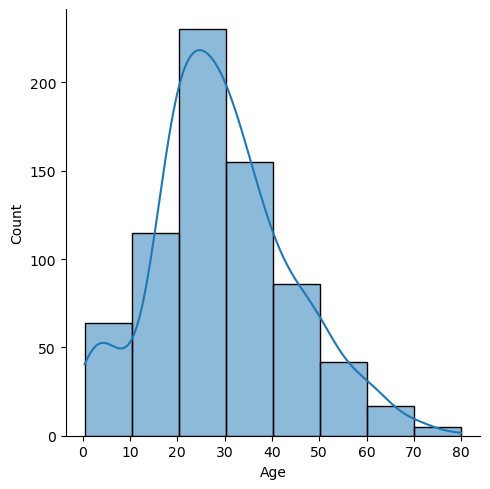

In [7]:
sns.displot(df["Age"],bins=8,kde=True)
plt.show()

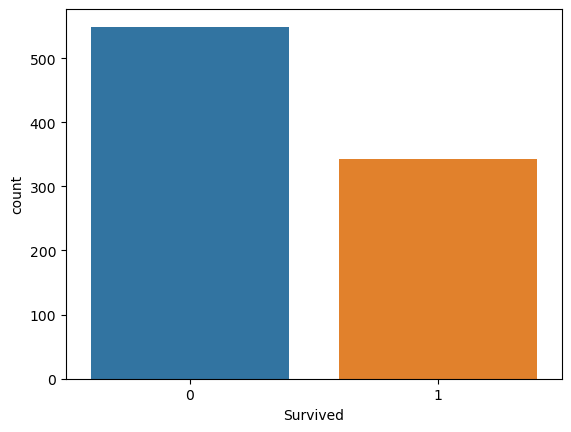

In [8]:
sns.countplot(x=df["Survived"])
plt.show()

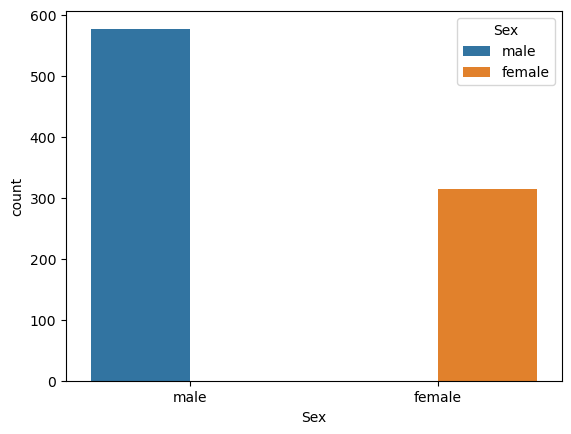

In [15]:
sns.countplot(x=df["Sex"],hue=df["Sex"])
plt.show()

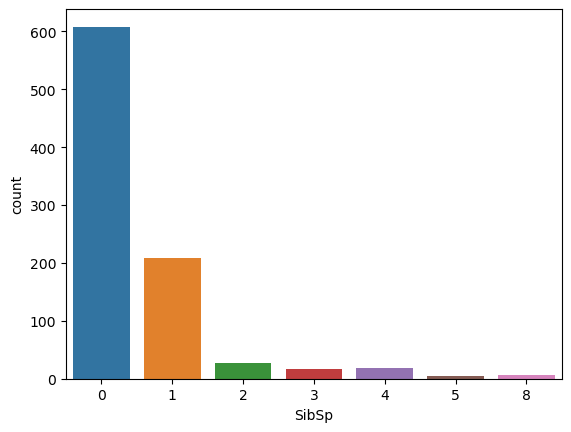

In [16]:
sns.countplot(x=df["SibSp"])
plt.show()

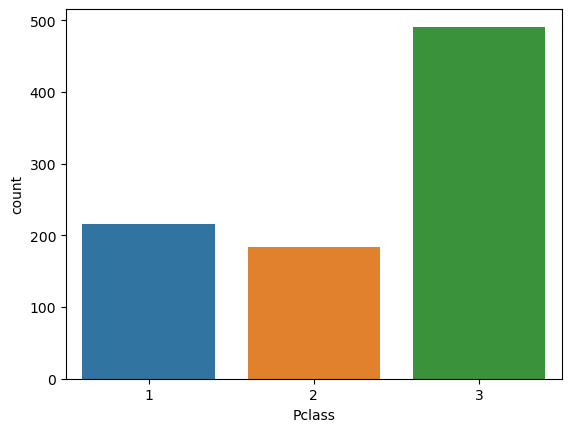

In [17]:
sns.countplot(x=df["Pclass"])
plt.show()

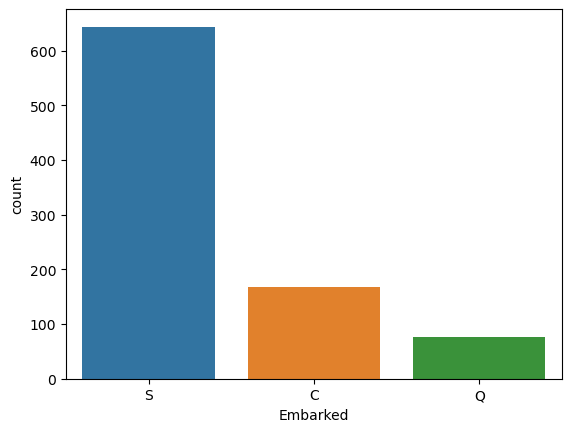

In [18]:
sns.countplot(x=df["Embarked"])
plt.show()

In [19]:
sex_ct = df.groupby('Sex')['Survived'].value_counts().unstack()
sex_ct


Survived,0,1
Sex,,
female,81,233
male,468,109


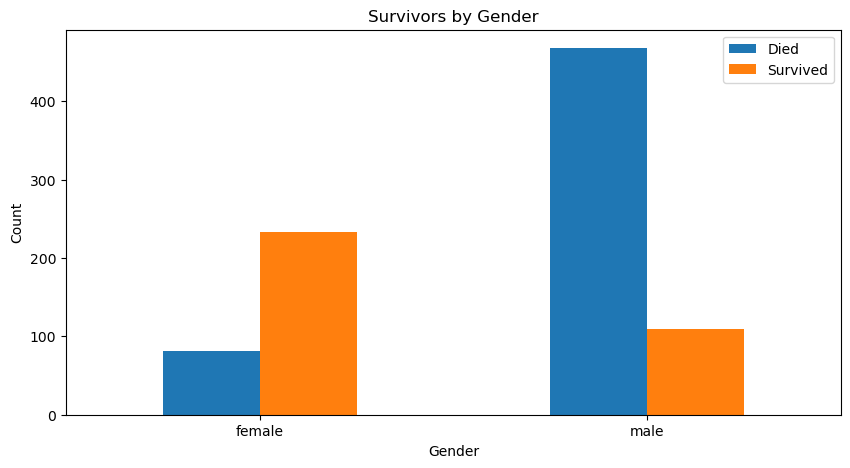

In [20]:
plt.rc('figure', figsize=(10, 5))

sex_ct.plot(kind='bar',)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


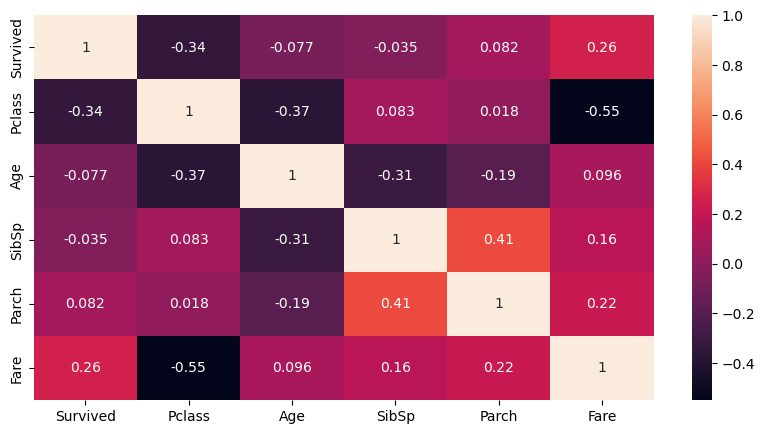

In [21]:

.
1

## Data preprocessing

In [22]:
## checking for missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Age and Embarked have missing values

In [23]:
## filling the missing values
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
df["Age"].fillna(np.random.randint(20,38),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
## Encoding 
df["Sex"].replace({"male":1,"female":0},inplace=True)
df["Embarked"].replace({"S":1,"C":0,"Q":2},inplace=True)

## splitting the data

In [25]:
x=pd.get_dummies(df.drop('Survived',axis=1),drop_first=True)
y=df['Survived']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.2,random_state=19)

In [26]:
print(len(x_train))
print(len(x_test))

712
179


## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train1=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## best random state

In [28]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

Train = []
Test = []
cv = []

for i in range(0, 100):
    # Split the data into train and test sets with a different random_state in each iteration
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=i)

    # Modeling
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Prediction
    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)

    # Calculate scores and append to lists
    Train.append(model.score(x_train, y_train))
    Test.append(model.score(x_test, y_test))
    cv.append(cross_val_score(model, x, y, cv=5).mean())

em = pd.DataFrame({"Train": Train, "Test": Test, "cv": cv})

# Filter for rows where the absolute differences are within the specified threshold
gm = em[(abs(em['Train'] - em["Test"]) <= 0.05) & (abs(em['Test'] - em['cv']) <= 0.05)]

# Find the index with the maximum 'Test' score
best_random_state = gm["Test"].idxmax()

print("Best random_state:", best_random_state)


Best random_state: 20


## Modelling

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=20)
model.fit(x_train1,y_train1)

ypred_train=model.predict(x_train1)
ypred_test=model.predict(x_test)

log_train_accuracy=accuracy_score(y_train1,ypred_train)
log_test_accuracy=accuracy_score(y_test,ypred_test)
scores=cross_val_score(model,x,y)
log_cvs=scores.mean()

print("train_accuracy:",log_train_accuracy)
print("test accuracy:",log_test_accuracy)
print("cvs:",log_cvs)

train_accuracy: 0.7893258426966292
test accuracy: 0.6424581005586593
cvs: 0.7822735547046639


**Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier()

param_grid={'criterion':["gini","entropy"],'max_depth':[1,2,3,4,5]}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy')

grid.fit(x_train1,y_train1)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [34]:
grid.best_estimator_.feature_importances_
feats= pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=x.columns,columns=["Feature Importance"])
feats_imp=feats[feats["Feature Importance"]>0]
important_features_list=feats_imp.index.to_list()

In [35]:
x_imp=x[important_features_list]
x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.2,random_state=20)
final_dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=20)
final_dt_model.fit(x_train,y_train)

ypred_train=final_dt_model.predict(x_train)
ypred_test=final_dt_model.predict(x_test)
dt_train_accuracy=accuracy_score(ypred_train,y_train)
dt_test_accuracy=accuracy_score(ypred_test,y_test)
dt_cvs=cross_val_score(final_dt_model,x,y,cv=5).mean()

print("train accuracy:",dt_train_accuracy)
print("test accuracy:",dt_test_accuracy)
print("cross val score:",dt_cvs)

train accuracy: 0.8132022471910112
test accuracy: 0.8603351955307262
cross val score: 0.8148076078086749


**Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=18)
param_grid={'n_estimators':list(range(1,20))}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(x_train1,y_train1)
grid.best_params_

{'n_estimators': 16}

In [37]:
grid.best_estimator_.feature_importances_
feats_imp = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=x.columns, columns=['Feature Importance'])
important_feats = feats_imp[feats_imp['Feature Importance'] > 0]
important_features_list = important_feats.index.to_list()

In [40]:
x_imp=x[important_features_list]
x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.2,random_state=18)

final_rf_model=RandomForestClassifier(n_estimators=16,random_state=20)
final_rf_model.fit(x_train,y_train)

ypred_train=final_rf_model.predict(x_train)
ypred_test=final_rf_model.predict(x_test)

rf_train_accuracy=accuracy_score(ypred_train,y_train)
rf_test_accuracy=accuracy_score(ypred_test,y_test)
rf_cvs=cross_val_score(final_rf_model,x,y,cv=5).mean()
##evalution
print("train accuracy:",rf_train_accuracy)
print("test accuracy:",rf_test_accuracy)
print("cross val score:",rf_cvs)

train accuracy: 0.9662921348314607
test accuracy: 0.8659217877094972
cross val score: 0.7957441466323519


**Adaboostclassifier**

In [41]:
from sklearn.ensemble import AdaBoostClassifier

estimator=AdaBoostClassifier()

param_grid={'n_estimators':list(range(1,20))}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy')

grid.fit(x_train1,y_train1)
grid.best_params_

{'n_estimators': 15}

In [42]:
grid.best_estimator_.feature_importances_
feats=pd.DataFrame(index=x.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_features=feats[feats["Importance"]>0.01]
imp_features_list=feats[feats["Importance"]>0.01].index.to_list()

x_imp=x[important_features_list]

In [43]:

x_imp=x[important_features_list]

x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.2,random_state=20)
ada_model=AdaBoostClassifier(n_estimators=15)
ada_model.fit(x_train,y_train)


ypred_train=ada_model.predict(x_train)
ypred_test=ada_model.predict(x_test)

ad_train_accuracy=accuracy_score(y_train,ypred_train)
ad_test_accuracy=accuracy_score(y_test,ypred_test)
ad_cvs=cross_val_score(ada_model,x,y).mean()
##evalution
print("train accuracy:",ad_train_accuracy)
print("test accuracy:",ad_test_accuracy)
print("cross val score:",ad_cvs)

train accuracy: 0.8075842696629213
test accuracy: 0.8379888268156425
cross val score: 0.810369719414977


**Gradient Boosting**

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
estimator =GradientBoostingClassifier()
param_grid={'n_estimators':[1,5,10,15,20],'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train1,y_train1)
grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 15}

In [45]:
grid.best_estimator_.feature_importances_
feats=pd.DataFrame(index=x.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_features=feats[feats["Importance"]>0.01]
imp_features_list=feats[feats["Importance"]>0.01].index.to_list()
imp_features_list

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [46]:
# Select important features
x_imp = x[imp_features_list]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_imp, y, test_size=0.2, random_state=20)

# Modeling with Gradient Boosting Classifier
gb_bhp = GradientBoostingClassifier(n_estimators=15, learning_rate=0.2)
gb_bhp.fit(x_train, y_train)

# Prediction
ypred_train = gb_bhp.predict(x_train)
ypred_test = gb_bhp.predict(x_test)

# Calculate accuracy scores
gb_train_accuracy = accuracy_score(y_train, ypred_train)
gb_test_accuracy = accuracy_score(y_test, ypred_test)
gb_cvs = cross_val_score(gb_bhp, x, y).mean()

# Evaluation
print("train accuracy:", gb_train_accuracy)
print("test accuracy:", gb_test_accuracy)
print("cross val score:", gb_cvs)


train accuracy: 0.8609550561797753
test accuracy: 0.8324022346368715
cross val score: 0.8159500345238844


**XGBoost**

In [47]:
from xgboost import XGBClassifier
estimator=XGBClassifier()

param_grid={'n_estimators':[10,20,30,40],'max_depth':[2,3,4,5,6],'gamma':[0,0.2,0.3,0.5,1]}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy')

grid.fit(x_train1,y_train1)
grid.best_params_

{'gamma': 0.5, 'max_depth': 5, 'n_estimators': 10}

In [49]:
grid.best_estimator_.feature_importances_
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                  index=x.columns,columns=["Importance"])
important_features=feats[feats["Importance"]>0.01]
imp_feature_list=feats[feats["Importance"]>0.01].index.to_list()

In [50]:
x_imp=x[imp_feature_list]
x_train, x_test, y_train, y_test = train_test_split(x_imp, y, test_size=0.2, random_state=20)
xgb_model=XGBClassifier(n_estimators=10,max_depth=5,gamma=0.5)
xgb_model.fit(x_train,y_train)

##
ypred_train=xgb_model.predict(x_train)
ypred_test=xgb_model.predict(x_test)

xgb_train_accuracy = accuracy_score(y_train, ypred_train)
xgb_test_accuracy = accuracy_score(y_test, ypred_test)
xgb_cvs = cross_val_score(gb_bhp, x, y).mean()

# Evaluation
print("train accuracy:", xgb_train_accuracy)
print("test accuracy:", xgb_test_accuracy)
print("cross val score:", xgb_cvs)

train accuracy: 0.8651685393258427
test accuracy: 0.8324022346368715
cross val score: 0.8159500345238844


In [51]:
## Model Selection

In [52]:
final_data=pd.DataFrame({"Models":['Logistic','DT','RF','ADB',
                                  'GB','XGB'],
                        "Train accuracy":[log_train_accuracy,
                                          dt_train_accuracy,
                                          rf_train_accuracy,
                                          ad_train_accuracy,
                                          gb_train_accuracy,
                                          xgb_train_accuracy],
                        "Test accuaracy":[log_test_accuracy,
                                          dt_test_accuracy,
                                          rf_test_accuracy,
                                          ad_test_accuracy,
                                          gb_test_accuracy,
                                          xgb_test_accuracy],
                        "CV_score":[log_cvs,dt_cvs,rf_cvs,ad_cvs,gb_cvs,
                                    xgb_cvs]})

In [53]:
final_data

,Models,Train accuracy,Test accuaracy,CV_score
0,Logistic,0.789326,0.642458,0.782274
1,DT,0.813202,0.860335,0.814808
2,RF,0.966292,0.865922,0.795744
3,ADB,0.807584,0.837989,0.810370
4,GB,0.860955,0.832402,0.815950
5,XGB,0.865169,0.832402,0.815950


**ADABOOST is the best model**

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[106,   6],
       [ 24,  43]], dtype=int64)

**Deployment of the best model**

In [55]:
from joblib import dump
dump(ada_model,"titanic_project.joblib")

['titanic_project.joblib']